In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 이제 상단의 런타임 -> 런타임 다시시작 해주세요

In [ ]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
fish = pd.read_csv(io.BytesIO(myfile['fish.csv']),
                       encoding='cp949')
fish

In [ ]:
import pandas as pd

fish = pd.read_csv('fish.csv')
fish

In [ ]:
fish.info()

In [ ]:
fish.describe()

In [ ]:
# 무게, 길이, 높이 넓이 정보를 가지고, 생선의 종류 예측

data = fish[ ['Weight','Length','Height','Width']].to_numpy()
target = fish['Species'].to_numpy()

# train, test 데이터 분리

from sklearn.model_selection import train_test_split
훈련용_data , 테스트용_data , 훈련용_target , 테스트용_target = train_test_split(
    data , target , test_size=0.2 , random_state=40)

# train, test 데이터 shape 확인
print(훈련용_data.shape , 테스트용_data.shape)

In [ ]:
# 훈련 데이터와 테스트데이터로 모델 검증합니다.
from sklearn.tree import DecisionTreeClassifier

for i in range(1, 20, 1):
    dt = DecisionTreeClassifier(max_depth=i ,random_state=10)
    dt.fit(훈련용_data , 훈련용_target)
    print(f'최대 깊이 {i} 훈련용 :', dt.score(훈련용_data , 훈련용_target))
    print(f'최대 깊이 {i} 테스트용 :', dt.score(테스트용_data , 테스트용_target))
    print()

In [ ]:
#Step 6. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.tree import plot_tree
plt.figure( figsize=(20,15))
plot_tree(dt, filled=True ,
          feature_names=['Weight','Length','Height','Width'] )

plt.show()

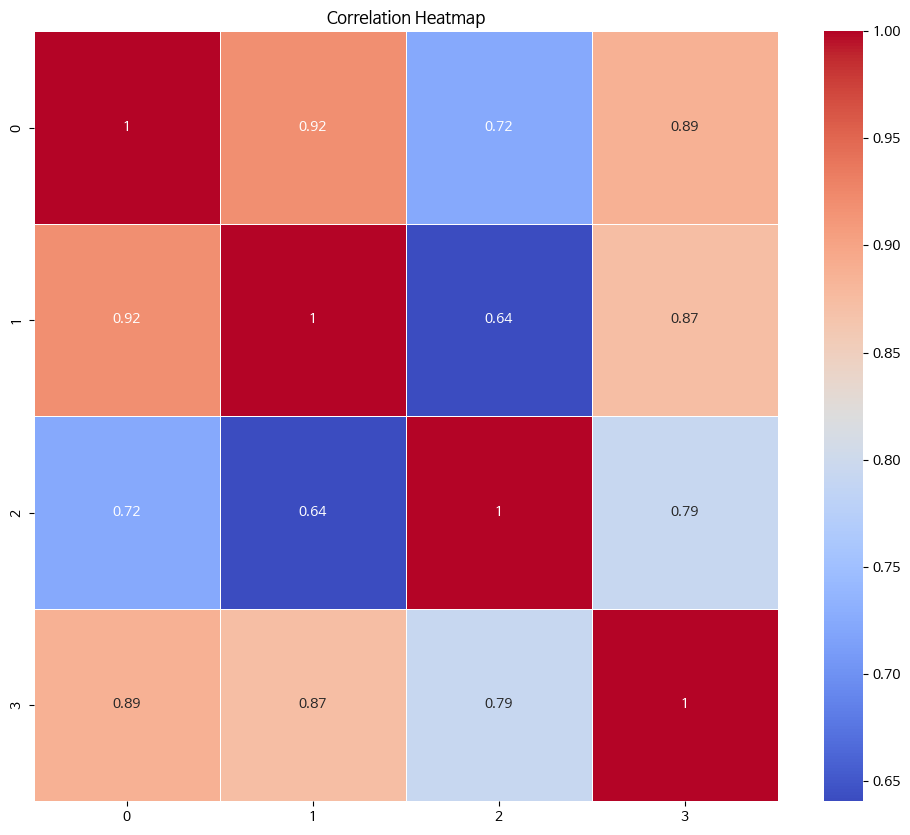

In [24]:
import seaborn as sns
# 상관관계 히트맵
plt.figure(figsize=(12, 10))
data_df = pd.DataFrame(data)
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()